In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt
import mglearn


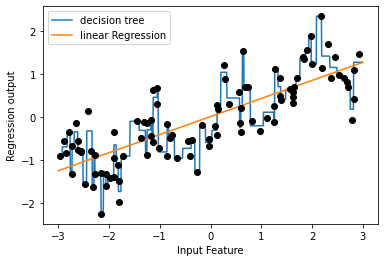

In [6]:
X, y= mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3,3,1000, endpoint=False).reshape(-1,1)
reg = DecisionTreeRegressor(min_samples_split=3).fit(X,y)
plt.plot(line, reg.predict(line), label="decision tree")
reg = LinearRegression().fit(X,y)
plt.plot(line, reg.predict(line), label="linear Regression")
plt.plot(X[:,0],y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input Feature")
plt.legend(loc="best")

In [8]:
bins = np.linspace(-3,3,11)
print("bins: {}".format(bins))

bins: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


In [9]:
#now we record for each data point which bin it falls into.
which_bin = np.digitize(X, bins=bins)
print("Data points", X[:5])
print("Bin Membership for data points: ", which_bin[:5])

Data points [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
Bin Membership for data points:  [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


In [10]:
#using one hot encoding on the bins to transform it from contineous to categorical
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
#encode.fit finds the unique values that appear in which_bin
encoder.fit(which_bin)
X_binned=encoder.transform(which_bin)
print(X_binned[:5])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


Text(0.5, 0, 'Input feature')

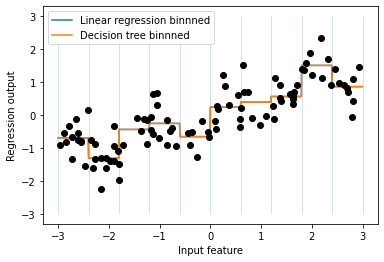

In [13]:
#Now we build a new model using one hot encoding data
line_binned = encoder.transform(np.digitize(line,bins=bins))
reg =LinearRegression().fit(X_binned, y)
plt.plot(line,reg.predict(line_binned), label="Linear regression binnned")

reg = DecisionTreeRegressor(min_samples_split =3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label="Decision tree binnned")
plt.plot(X[:,0], y, 'o', c='k')
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")

In [ ]:
'''
1. Both the lines are on top of each other , i.e linear and decision tree make exactly the same prediction.
2. For each bin they predict a constant value, any model must predict the same value for all points within a bin.
3. Comparing what models learn befire and after binning, it is observed that linear model becomes more flexible(it has 
different value for each bin) while decision tree is less flexible
4. Binning has not benifit effect for tree based model, as these models can split up the data anywhere
5. Decision trees look at mulitple features at once while binnning is usually done on a per feature basis.
'''

'''
Note:
If there are good reasons to use a linear model for a particular dataset, i.e it is very large and high dimensional,
but some features have non linear relations with the output- binning can be a great way to increase modeling power.
'''